In [7]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load dataset (use appropriate path)
df = pd.read_excel('(LABELED)FROM NOV(13) TO DEC(27).xlsx')

# Convert 'Datetime' column to proper datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Remove URLs from the 'text' column
df['Text'] = df['Text'].apply(lambda x: re.sub(r'http\S+', '', str(x)))

# Remove special characters and punctuation from 'text'
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)))

# Convert 'text' to lowercase
df['Text'] = df['Text'].str.lower()

# Tokenization (splitting the text into individual words)
df['text_tokenized'] = df['Text'].apply(word_tokenize)

# Remove stopwords (common words that don't add much value to sentiment analysis)
stop_words = set(stopwords.words('english'))
df['text_tokenized'] = df['text_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization (convert words to their base form)
lemmatizer = WordNetLemmatizer()
df['text_lemmatized'] = df['text_tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Optional: Map sentiments to numeric labels if needed
df['sentiment_label'] = df['Label'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})

# Drop unnecessary columns if needed (e.g., user_handle, tweet_id)
df_cleaned = df.drop(columns=['Username', 'Tweet Id', 'score'])

# Save the cleaned dataset to a new file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned dataframe
df_cleaned.head()


,Datetime,Text,Label,text_tokenized,text_lemmatized,sentiment_label
0,2022-11-13 23:59:34+00:00,ada berita bagus buat kadrun amp pasukan demo ...,Neutral,"[ada, berita, bagus, buat, kadrun, amp, pasuka...","[ada, berita, bagus, buat, kadrun, amp, pasuka...",1
1,2022-11-13 23:59:31+00:00,secblinken israel behind it stop the jewish h...,Negative,"[secblinken, israel, behind, stop, jewish, hat...","[secblinken, israel, behind, stop, jewish, hat...",0
2,2022-11-13 23:59:21+00:00,tfiddlersgreen thekesh luanagoriss ostrova onl...,Negative,"[tfiddlersgreen, thekesh, luanagoriss, ostrova...","[tfiddlersgreen, thekesh, luanagoriss, ostrova...",0
3,2022-11-13 23:59:18+00:00,worldmusicaward nickiminaj greatest prize \ngr...,Positive,"[worldmusicaward, nickiminaj, greatest, prize,...","[worldmusicaward, nickiminaj, greatest, prize,...",2
4,2022-11-13 23:59:09+00:00,onfiregama nusantaraone notonegoro arab yaman ...,Neutral,"[onfiregama, nusantaraone, notonegoro, arab, y...","[onfiregama, nusantaraone, notonegoro, arab, y...",1


In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
import nltk
from collections import Counter

df = pd.read_csv('cleaned_dataset.csv')  # If using CSV file

# Convert 'Datetime' to datetime object and remove timezone if it exists
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce').dt.tz_localize(None)

# Define World Cup time periods
before_wc = df['Datetime'] < '2022-11-20'
during_wc = (df['Datetime'] >= '2022-11-20') & (df['Datetime'] <= '2022-12-18')
after_wc = df['Datetime'] > '2022-12-18'

# Create a new column that categorizes tweets into "Before", "During", and "After" the World Cup
df['period'] = pd.cut(df['Datetime'], 
                      bins=[pd.Timestamp.min, pd.Timestamp('2022-11-20'), pd.Timestamp('2022-12-18'), pd.Timestamp.max], 
                      labels=['Before', 'During', 'After'])

# Display the first few rows to verify
df.head()


,Datetime,Text,Label,text_tokenized,text_lemmatized,sentiment_label,period
0,2022-11-13 23:59:34,ada berita bagus buat kadrun amp pasukan demo ...,Neutral,"['ada', 'berita', 'bagus', 'buat', 'kadrun', '...","['ada', 'berita', 'bagus', 'buat', 'kadrun', '...",1,Before
1,2022-11-13 23:59:31,secblinken israel behind it stop the jewish h...,Negative,"['secblinken', 'israel', 'behind', 'stop', 'je...","['secblinken', 'israel', 'behind', 'stop', 'je...",0,Before
2,2022-11-13 23:59:21,tfiddlersgreen thekesh luanagoriss ostrova onl...,Negative,"['tfiddlersgreen', 'thekesh', 'luanagoriss', '...","['tfiddlersgreen', 'thekesh', 'luanagoriss', '...",0,Before
3,2022-11-13 23:59:18,worldmusicaward nickiminaj greatest prize \ngr...,Positive,"['worldmusicaward', 'nickiminaj', 'greatest', ...","['worldmusicaward', 'nickiminaj', 'greatest', ...",2,Before
4,2022-11-13 23:59:09,onfiregama nusantaraone notonegoro arab yaman ...,Neutral,"['onfiregama', 'nusantaraone', 'notonegoro', '...","['onfiregama', 'nusantaraone', 'notonegoro', '...",1,Before


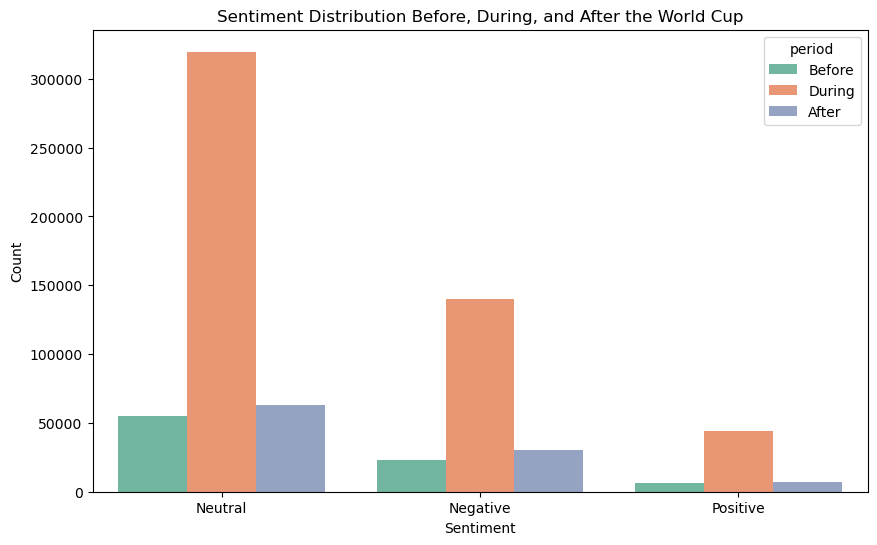

In [15]:
# Sentiment Distribution by Period
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', hue='period', data=df, palette='Set2')
plt.title('Sentiment Distribution Before, During, and After the World Cup')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


C:\Users\test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When 

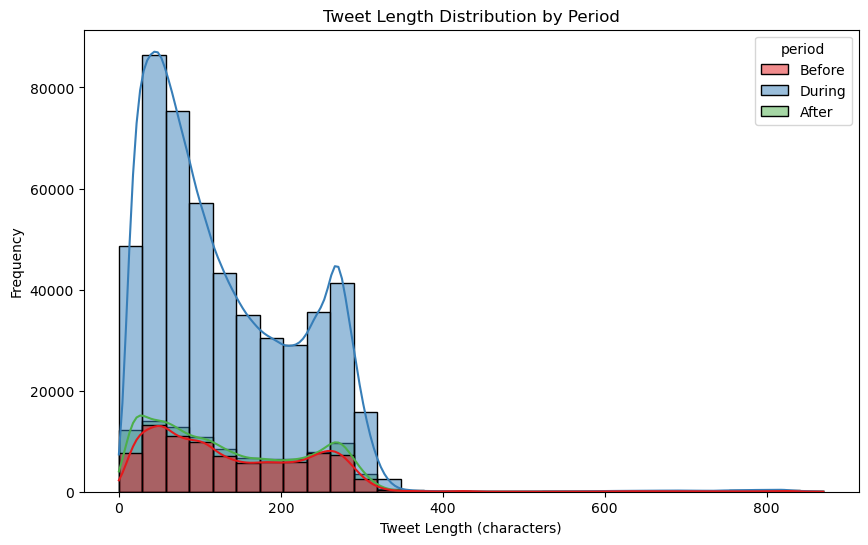

In [16]:
# Ensure missing values in 'Text' are handled by replacing NaNs with empty strings
df['Text'] = df['Text'].fillna('')

# Calculate tweet length
df['tweet_length'] = df['Text'].apply(len)

# Plot tweet length distribution by period
plt.figure(figsize=(10, 6))
sns.histplot(df, x='tweet_length', hue='period', bins=30, kde=True, palette='Set1')
plt.title('Tweet Length Distribution by Period')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()


C:\Users\test\AppData\Local\Temp\ipykernel_17760\1629687988.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sentiment = df.groupby('period')['sentiment_label'].mean()


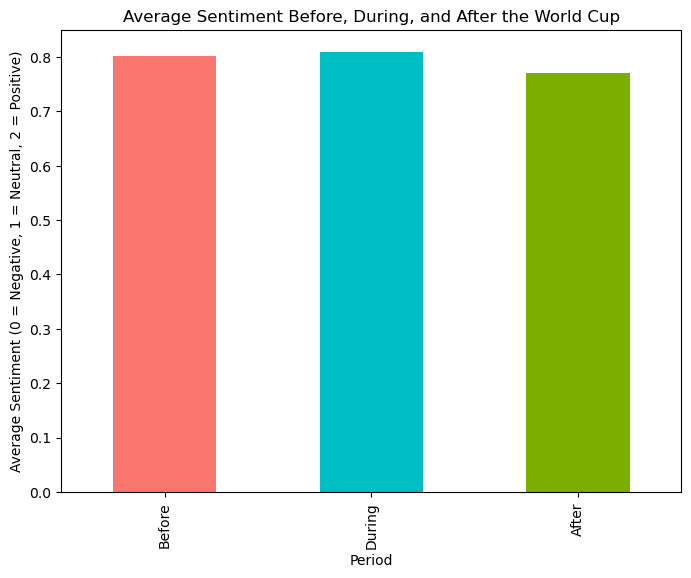

In [17]:
# Map 'sentiment_label' back to numeric values (e.g., Negative=0, Neutral=1, Positive=2)
df['sentiment_label'] = df['Label'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})

# Group by period and calculate average sentiment
average_sentiment = df.groupby('period')['sentiment_label'].mean()

# Plot average sentiment by period
plt.figure(figsize=(8, 6))
average_sentiment.plot(kind='bar', color=['#f8766d', '#00bfc4', '#7cae00'])
plt.title('Average Sentiment Before, During, and After the World Cup')
plt.ylabel('Average Sentiment (0 = Negative, 1 = Neutral, 2 = Positive)')
plt.xlabel('Period')
plt.show()


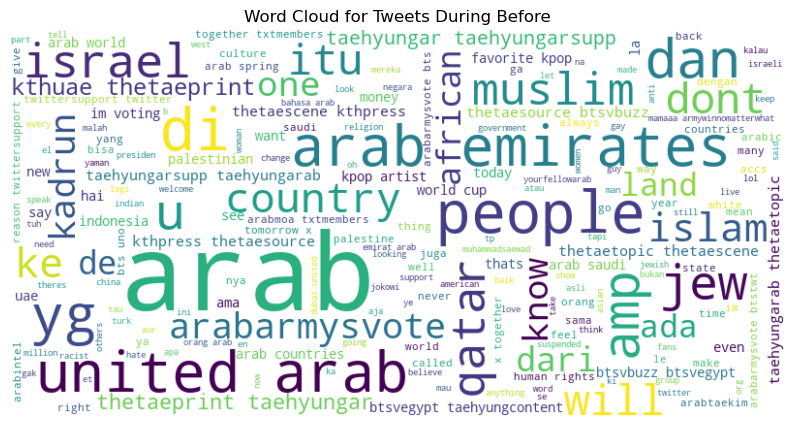

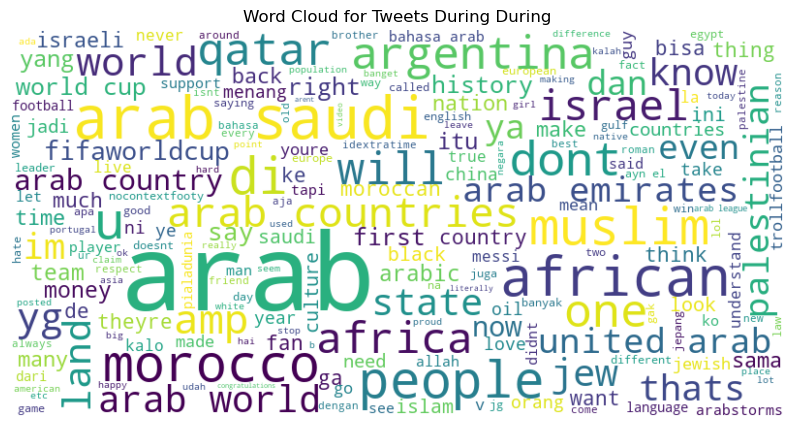

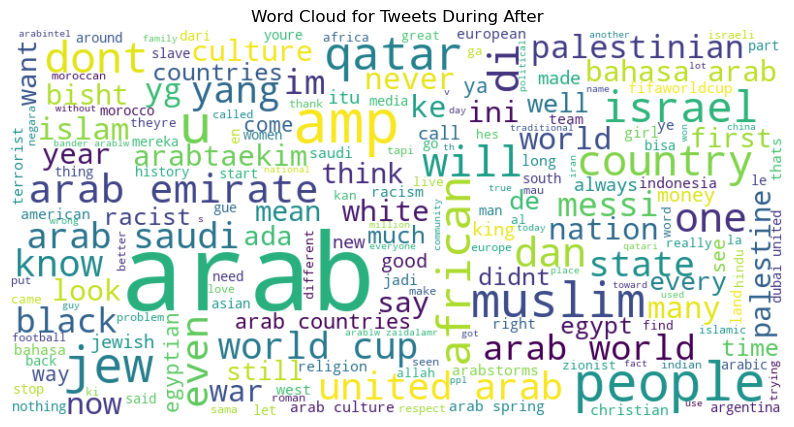

In [19]:
# Function to generate word cloud for a given period and sentiment with sampling
def generate_wordcloud(period, sample_size=1000):
    # Sample the data to limit the number of tweets
    period_data = df[df['period'] == period].sample(n=sample_size, random_state=21, replace=True) if len(df[df['period'] == period]) > sample_size else df[df['period'] == period]
    
    words = ' '.join(period_data['Text'])
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Tweets During {period}')
    plt.show()

# Word Clouds for "Before", "During", and "After" with a sample of 1000 tweets per period
generate_wordcloud('Before', sample_size=1000)
generate_wordcloud('During', sample_size=1000)
generate_wordcloud('After', sample_size=1000)


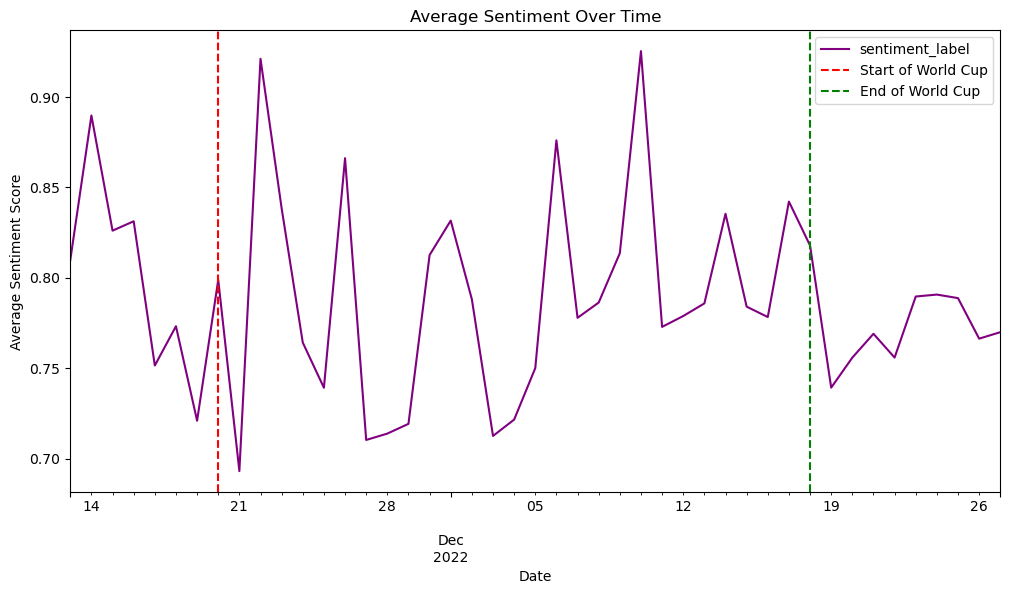

In [22]:
# Ensure the 'Datetime' column is set as the index
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')  # Convert if not already done
df.set_index('Datetime', inplace=True)

# Resample sentiment counts by day and plot sentiment trends
plt.figure(figsize=(12, 6))
df.resample('D')['sentiment_label'].mean().plot(kind='line', color='purple')
plt.title('Average Sentiment Over Time')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Date')
plt.axvline(pd.Timestamp('2022-11-20'), color='red', linestyle='--', label='Start of World Cup')
plt.axvline(pd.Timestamp('2022-12-18'), color='green', linestyle='--', label='End of World Cup')
plt.legend()
plt.show()
